In [38]:
!pip install binclass-tools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.0 MB/s eta 0:00:00


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bctools as bc


In [7]:
# Leemos los datos
df = sns.load_dataset('titanic')
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

## Exploración de datos

In [6]:
df.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [11]:
print(df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:
df.groupby("pclass")["survived"].agg(["count", "sum", "mean"])

count  sum      mean
pclass                      
1         216  136  0.629630
2         184   87  0.472826
3         491  119  0.242363

In [10]:
df.groupby("sex")["survived"].agg(["count", "sum", "mean"])

count  sum      mean
sex                         
female    314  233  0.742038
male      577  109  0.188908

In [14]:
df.groupby(["embark_town"])["survived"].agg(["count", "sum", "mean"])

count  sum      mean
embark_town                      
Cherbourg      168   93  0.553571
Queenstown      77   30  0.389610
Southampton    644  217  0.336957

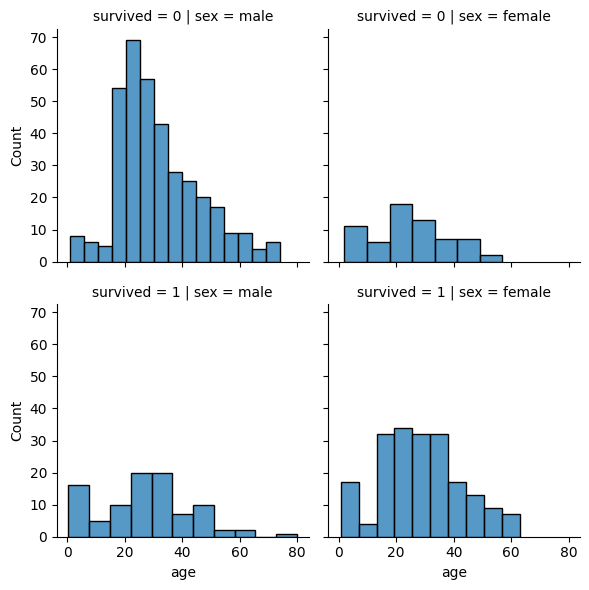

In [18]:
g = sns.FacetGrid(df, col="sex",  row="survived")
g.map_dataframe(sns.histplot, x="age")

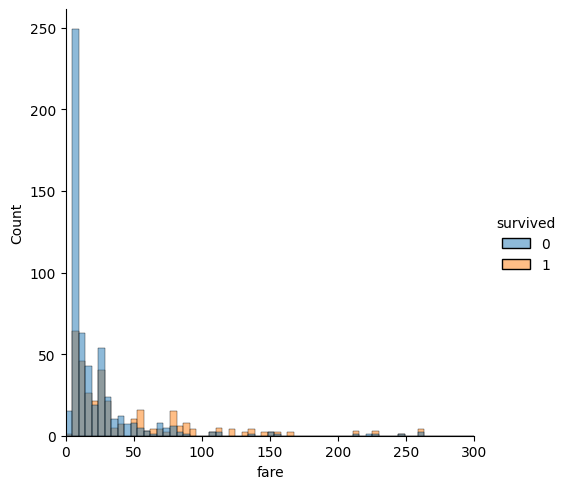

In [27]:
ax = sns.displot(data=df, x="fare", hue="survived")
ax.set(xlim = (0,300))

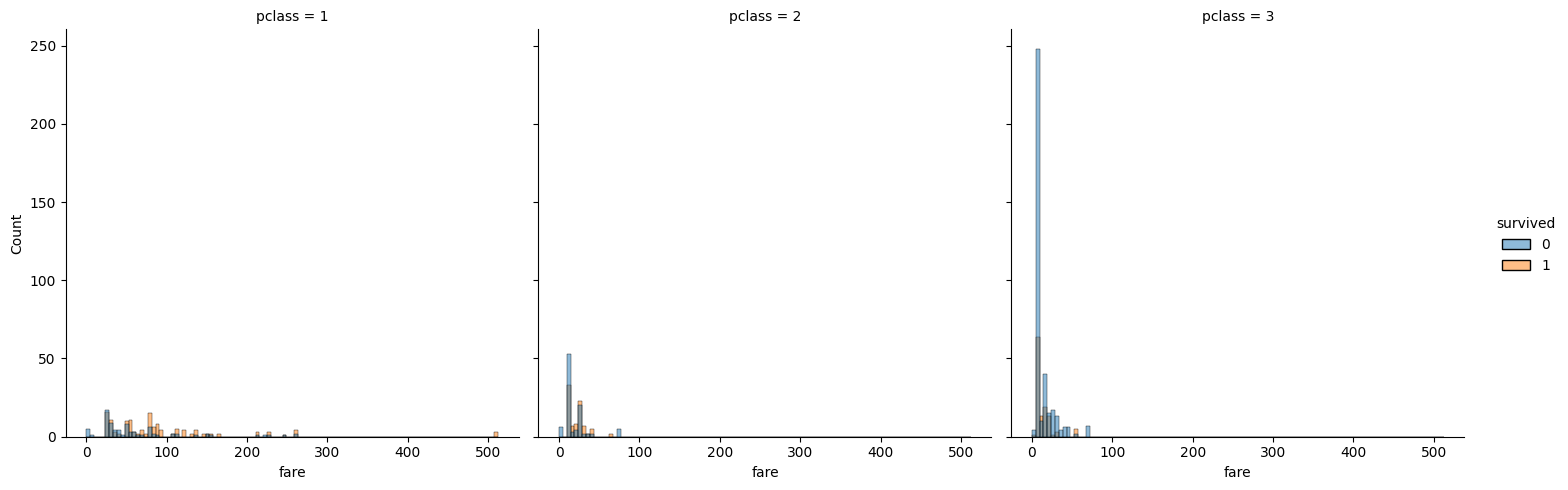

In [32]:
sns.displot(data=df, x="fare", hue="survived", col="pclass")

<Axes: xlabel='age', ylabel='fare'>

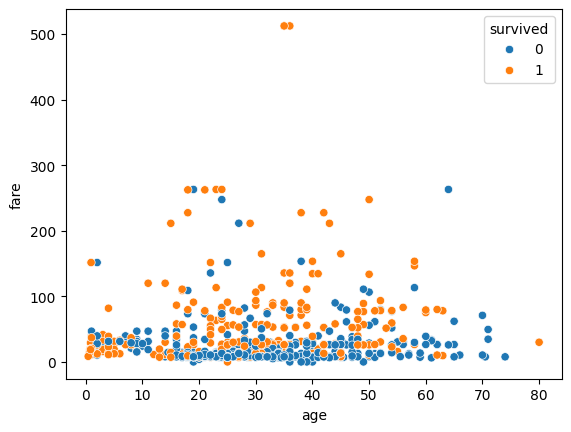

In [24]:
sns.scatterplot(data=df, x="age", y="fare", hue="survived")

<Axes: xlabel='who', ylabel='count'>

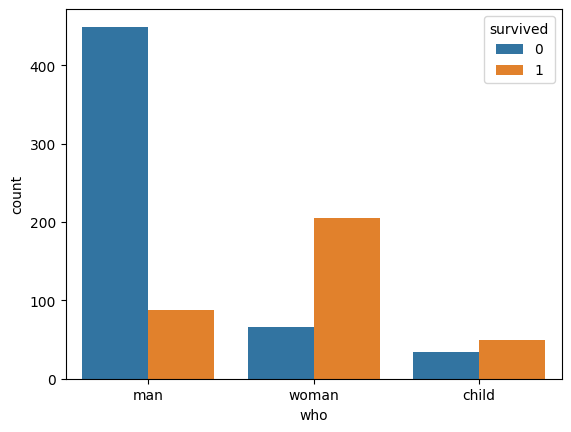

In [34]:
sns.countplot(data=df, x="who", hue="survived")

In [ ]:
# Ejercicio: Continuar con la exploracion de datos

## Predicción del target survived

In [40]:
# Prediccion del modelo (No presteis demasiada atención aqui)
from sklearn.linear_model import LogisticRegression
y = df["survived"]
X = pd.get_dummies(df[["pclass", "age", "sex", "fare"]].fillna("mean"))

logreg = LogisticRegression()
logreg.fit(X,y)
df["pred_proba"] = logreg.predict_proba(X)[:,1]
df["pred"] = logreg.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluación del modelo

Primero veamos las métricas a usar para valorar un modelo de clasificación:

![metricas](https://i1.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2019/05/confusion_matix_example-2.png?fit=525%2C525)

In [51]:
# Distribucion de las probabilidades
px.ecdf(df, x="pred_proba", color="survived")

In [44]:
# Distribucion de densidad
threshold_step = 0.01
curve_type = 'kde' #'kde' is the default value, can also be set to 'normal'

density_curve_kde = bc.predicted_proba_density_curve_plot(true_y = df["survived"],
                                                          predicted_proba = df["pred_proba"],
                                                          threshold_step = threshold_step,
                                                          curve_type = curve_type)
density_curve_kde

In [46]:
# Matriz de confusion y metricas
cf_fig, var_metrics_df, invar_metrics_df, opt_thresh_df = bc.confusion_matrix_plot(
    true_y = df["survived"],
    predicted_proba = df["pred_proba"],
    threshold_step = threshold_step,
    title = 'Interactive Confusion Matrix')
cf_fig

In [47]:
# Curva lift
lift_curve = bc.lift_curve_plot(true_y = df["survived"],
                                full_predicted_proba = logreg.predict_proba(X),
                                pos_label = 1,
                                )
lift_curve

Class 0 is associated with probabilities: full_predicted_proba[:, 0]
Class 1 is associated with probabilities: full_predicted_proba[:, 1]


In [48]:
# Curva response
resp_curve = bc.response_curve_plot(true_y = df["survived"],
                                    predicted_proba = df["pred_proba"],
                                    n_tiles = 10,
                                    )
resp_curve

In [49]:
# Curva cumulative response
cumres_plot = bc.cumulative_response_plot(true_y = df["survived"],
                                          predicted_proba = df["pred_proba"],
                                          )
cumres_plot

In [50]:
calib_curve, ece = bc.calibration_curve_plot(true_y = df["survived"],
                                             predicted_proba = df["pred_proba"],
                                             n_bins = 10,           #default
                                             strategy = 'uniform',  #default
                                             show_gaps = False,      #default
                                             ece_bins = 'fd'        #default
                                            )

calib_curve